**How to Create a Simple Neural Network in Python**

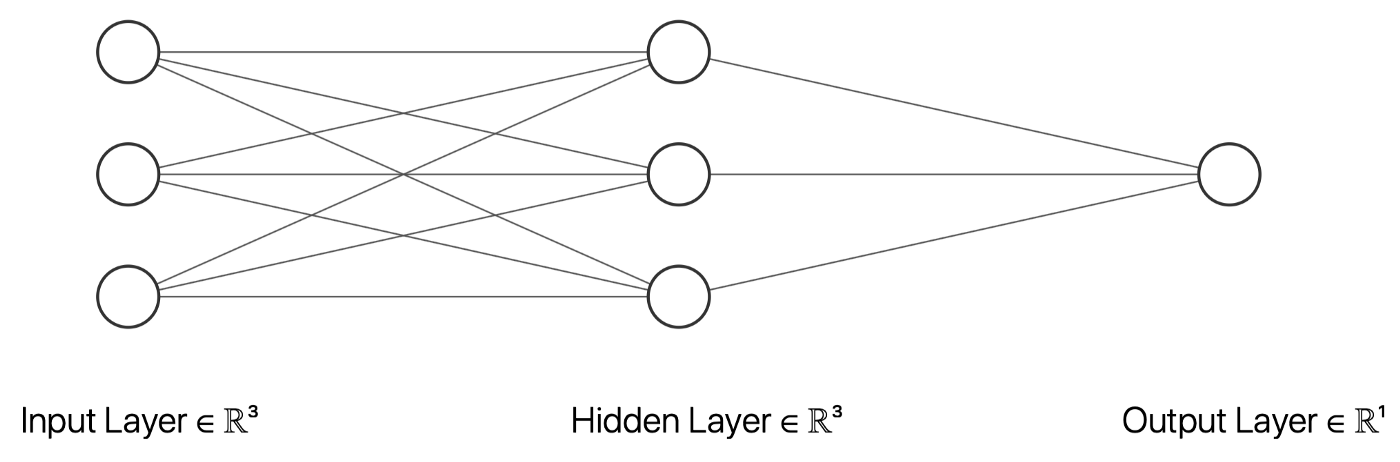

Step 1: Import NumPy, Scikit-learn and Matplotlib

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Step 2: Create a Training and Test Data Set

In this simple neural network, we will classify 1x3 vectors with 10 as the first element. Input and output training and test sets are created using NumPy’s array function, and input_pred is created to test a prediction function that will be defined later. Both the training and the test data are comprised of six samples with three features each, and since the output is given, we understand that this is an example of supervised learning.

In [2]:
input_train = np.array([[0, 1, 0], [0, 1, 1], [0, 0, 0], [10, 0, 0], [10, 1, 1], [10, 0, 1]])
output_train = np.array([[0], [0], [0], [1], [1], [1]])
input_pred = np.array([1, 1, 0])  
input_test = np.array([[1, 1, 1], [10, 0, 1], [0, 1, 10], [10, 1, 10], [0, 0, 0], [0, 1, 1]])
output_test = np.array([[0], [1], [0], [1], [0], [0]])

Step 3: Scale the Data

Doing feature scaling is extremely easy in Python due to the Scikit-learn package, and its MinMaxScaler class. Simply create a MinMaxScaler object, and use the fit_transform function with your non-scaled data as input, and the function will return the same data scaled. 

In [3]:
scaler = MinMaxScaler()
input_train_scaled = scaler.fit_transform(input_train)
output_train_scaled = scaler.fit_transform(output_train)
input_test_scaled = scaler.fit_transform(input_test)
output_test_scaled = scaler.fit_transform(output_test)

Step 4: Create a Neural Network

In the example, I have chosen a neural network with three input nodes, three nodes in the hidden layer, and one output node.  

1. inputSize is the number of input nodes, which should be equal to the number of features in our input data. 
2. outputSize is equal to the number of output nodes. 
3. hiddenSize describes the number of nodes in the hidden layer.

Further, there will be weights between the different nodes in our network that will be adjusted during training. 


The error_list will contain the mean absolute error (MAE) for each of the epochs, and the limit will describe the boundary for when a vector should be classified as a vector with element 10 as the first element and not. Then, there are variables that will be used to store the number of true positives, false positives, true negatives, and false negatives.

In [4]:
inputSize = 3
outputSize = 1
hiddenSize = 3

W1 = np.random.rand(inputSize, hiddenSize)
W2 = np.random.rand(hiddenSize, outputSize)

error_list = []
limit = 0.5
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0 

To calculate the values at each node in every layer, the values at the nodes in the previous layer will be matrix multiplied with the applicable weights before a non-linear activation function will be applied to widen the possibilities for the final output function. In this example, we have chosen the Sigmoid as the activation function, but there are also many other alternatives.

In [5]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def sigmoidPrime(s):
    return s * (1 - s) 

Step 4.1 : Create a Forward Propagation Function

The purpose of the forward pass function is to iterate forward through the different layers of the neural network to predict output for that particular epoch. Then, looking at the difference between the predicted output and the actual output, the weights will be updated during backward propagation.

In [6]:
#Create a Forward Propagation Function
def forward(X):
    global z,z2,z3
    z = np.matmul(X, W1)
    z2 = sigmoid(z)
    z3 = np.matmul(z2, W2)
    o = sigmoid(z3)
    return o 

Step 4.2 : Create a Backward Propagation Function 

Backpropagation is the process that updates the weights for the different nodes in the neural network and hence decides their importance.

In [7]:
#Create a Backward Propagation Function
def backward(X, y, o):
    global z2,W2,W1,o_error
    o_error = y - o
    o_delta = o_error * sigmoidPrime(o)
    z2_error = np.matmul(o_delta, np.matrix.transpose(W2))
    z2_delta = z2_error * sigmoidPrime(z2)
    W1 += np.matmul(np.matrix.transpose(X), z2_delta)
    W2 += np.matmul(np.matrix.transpose(z2), o_delta)

Step 4.3 : Create a Training Function

During training, the algorithm will run forward and backward pass and thereby updating the weights as many times as there are epochs. This is necessary in order to end up with the most precise weights.

In addition to running forward and backward pass, we save the mean absolute error (MAE) to an error list so that we can later observe how the mean absolute error develops during the course of the training.

In [8]:
#Create a Training Function
def train(X, y, epochs): 
    global o_error
    for epoch in range(epochs): 
        o = forward(X)
        backward(X, y, o)
        error_list.append(np.abs(o_error).mean()) 

Step 4.4 : Create a Prediction Function

After the weights are fine-tuned during training, the algorithm is ready to predict the output for new data points. This is done through a single iteration of forwarding pass. The predicted output will be a number that hopefully will be quite close to the actual output.

In [9]:
#Create a Prediction Function
def predict(x_predicted):
    return forward(x_predicted).item()


Step 5 : Plot the Mean Absolute Error Development

There are many ways to evaluate the quality of a machine learning algorithm. One of the measures that are often used is the mean absolute error, and this should decrease with the number of epochs.

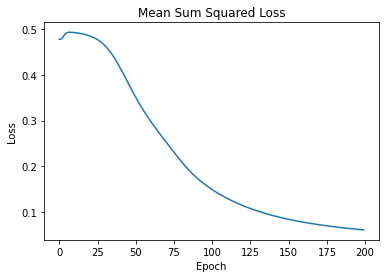

In [10]:
#Plot the Mean Absolute Error Development
def view_error_development():
    plt.plot(range(len(error_list)), error_list)
    plt.title('Mean Sum Squared Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

Step 6 : Calculate the Accuracy and its Components

The number of true positives, false positives, true negatives, and false negatives describes the quality of a machine learning classification algorithm. After training the neural network, the weights should be updated so that the algorithm is able to accurately predict new data points. In binary classification tasks, these new data points can only be 1 or 0. Depending on whether the predicted value is above or below the defined limit, the algorithm will classify the new entry as 1 or 0.



In [11]:
#Calculate the Accuracy and its Components
def test_evaluation(input_test, output_test):
    global true_positives, true_negatives, false_positives, false_negatives
    for i, test_element in enumerate(input_test):
        if predict(test_element) > limit and output_test[i] == 1:
           true_positives += 1
        if predict(test_element) < limit and output_test[i] == 1:
           false_negatives += 1
        if predict(test_element) > limit and output_test[i] == 0:
           false_positives += 1
        if predict(test_element) < limit and output_test[i] == 0:
           true_negatives += 1

        print('True positives: ', true_positives,
              '\nTrue negatives: ', true_negatives,
              '\nFalse positives: ', false_positives,
              '\nFalse negatives: ', false_negatives,
              '\nAccuracy: ',
              (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives))

True positives:  0 
True negatives:  1 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  1 
True negatives:  1 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  1 
True negatives:  2 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  2 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  3 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  4 
False positives:  0 
False negatives:  0 
Accuracy:  1.0


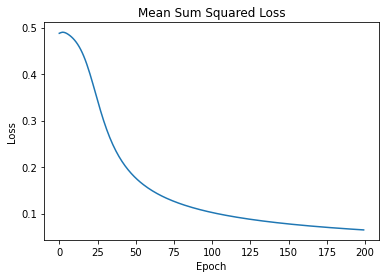

In [12]:
#Run a Script That Trains and Evaluate the Neural Network Model

train(input_train_scaled, output_train_scaled, 200)
predict(input_pred)
view_error_development()
test_evaluation(input_test_scaled, output_test_scaled)

**Conclusion**

When running the test_evaluation function, we get the following results:

True positives: 2
True negatives: 4
False positives: 0
False negatives: 0

Accuracy is given by the following formula:

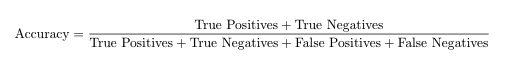